In [1]:
# 收集昌平沙河租房数据

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
def Select(table):
    rows=table.find_elements(By.TAG_NAME,'dl')
    page_data=[]
    for row in rows:
        intro=row.find_element(By.CLASS_NAME,'font15')
        rent=row.find_element(By.CLASS_NAME,'price')
        rows_data=[rent.text,intro.text]
        page_data.append(rows_data)
    df=pd.DataFrame(page_data)
    return df

#收集原始的有用数据

In [3]:
def SelectNum(table):
    rows=table.find_elements(By.TAG_NAME,'dl')
    page_data=[]
    for row in rows:
        intro=row.find_element(By.CLASS_NAME,'font15')
        rent=row.find_element(By.CLASS_NAME,'price')
        rows_data=[Text2Num(rent.text),find_m2(intro.text)]
        page_data.append(rows_data)
    df=pd.DataFrame(page_data)
    return df

# 收集但只保留数据的数值格式

In [4]:
def find_m2(text):
    num=re.search(r'(\d+(\.\d+)?)㎡',text)
    return float(num.group(1))

# 将文本中的房子面积数据提取出来

In [5]:
def Text2Num(text):
    matches=re.findall(r"[\d.]+", text)
    number=''.join(matches)
    return float(number)

# 将文本中的价格数据提取出来

In [6]:
driver=webdriver.Chrome()

url="https://zu.fang.com/house-a012-b02698/"
driver.get(url)
driver.maximize_window()

# 打开网页

In [7]:
string_list=[]
num_data=[]
for i in range(20):
    table=driver.find_element(By.CLASS_NAME,'houseList')
    df=Select(table)
    num_df=SelectNum(table)
    string_list.append(df)
    num_data.append(num_df)
    
    nextpage=driver.find_element(By.LINK_TEXT,'下一页')
    nextpage.click()
string_list
num_data

# 收集20页的数据

[          0      1
 0    2300.0   36.0
 1    2300.0   36.0
 2    1050.0   18.0
 3    1200.0   18.0
 4   22000.0  233.0
 5   25000.0  385.0
 6    1050.0   18.0
 7    1100.0   18.0
 8   20000.0  545.0
 9   25000.0  500.0
 10   1100.0   15.0
 11   1000.0   18.0
 12   1000.0   18.0
 13   1000.0   18.0
 14   1100.0   18.0
 15   1000.0   18.0
 16   1200.0   18.0
 17   1050.0   18.0
 18   1000.0   28.0
 19   1000.0   18.0
 20   1000.0   18.0
 21   1000.0   18.0
 22   1000.0   18.0
 23   1300.0   18.0
 24   1000.0   18.0
 25   1000.0   18.0
 26   1000.0   18.0
 27   1000.0   18.0
 28   1000.0   18.0
 29   1000.0   18.0
 30   1000.0   18.0
 31   1000.0   18.0
 32   1000.0   18.0
 33   1100.0   15.0
 34   1000.0   19.0
 35   1000.0   18.0
 36   3980.0   60.0
 37   3600.0   63.0
 38   1000.0   18.0
 39   1000.0   18.0
 40   3500.0   55.0
 41   1000.0   18.0
 42   1000.0   18.0
 43   1000.0   18.0
 44   1000.0   18.0
 45   1000.0   18.0
 46   1000.0   18.0
 47   1000.0   19.0
 48   4000.0   80.0


In [8]:
driver.quit()

In [9]:
df_full=pd.concat(string_list)
df_full.columns=['rent(yuan)',
'introduction']
df_full

# 合并每页的数据并添加列名

,rent(yuan),introduction
0,2300,整租|1室1厅|36㎡|朝东南
1,2300,整租|1室0厅|36㎡|朝东南
2,1050,整租|1室0厅|18㎡|朝西南
3,1200,整租|1室0厅|18㎡|朝南北
4,22000,整租|5室3厅|233㎡|朝南
...,...,...
55,4900,整租|2室1厅|85㎡|朝南
56,3100,整租|2室1厅|70㎡|朝南北
57,4400,整租|2室1厅|76㎡|朝南
58,5800,整租|3室1厅|126㎡|朝南北


In [10]:
num_full=pd.concat(num_data)
num_full.columns=['rent(yuan)',
'm2']
num_full

# 合并每页的数据并添加列名

,rent(yuan),m2
0,2300.0,36.0
1,2300.0,36.0
2,1050.0,18.0
3,1200.0,18.0
4,22000.0,233.0
...,...,...
55,4900.0,85.0
56,3100.0,70.0
57,4400.0,76.0
58,5800.0,126.0


In [14]:
num_full.to_csv("zu_changping_shahe.csv",index=False)

#导出数据

Text(0.5, 0, 'rent')

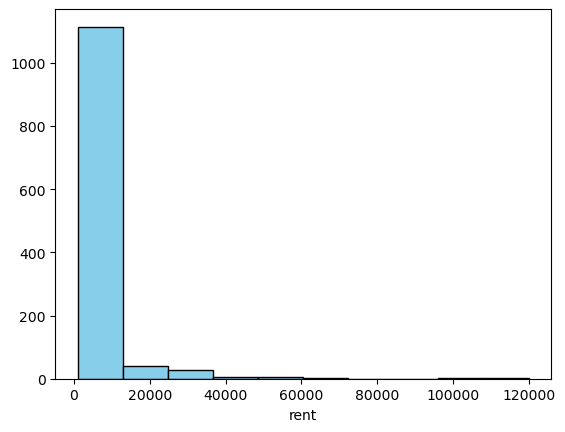

In [18]:
plt.hist(num_full['rent(yuan)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('rent')

Text(0, 0.5, 'm2')

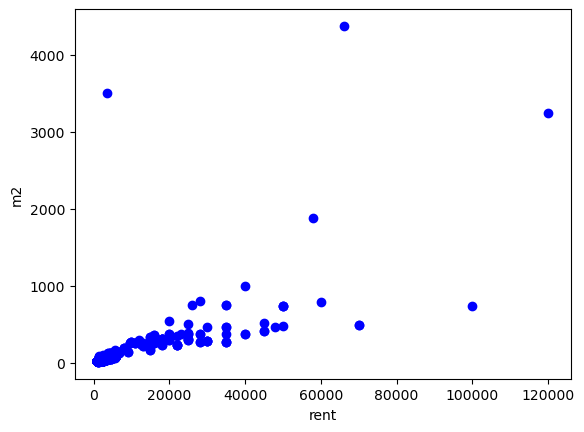

In [17]:
plt.scatter(num_full['rent(yuan)'], num_full['m2'], color='blue')
plt.xlabel('rent')
plt.ylabel('m2')

存在将租金填到面积一栏的错误数据